In [1]:
import subprocess
import sys

import json

import numpy as np

import timeit
import matplotlib.pyplot as plt

s=5
Time taken by np.sum: 11.14 ms.
Time taken by np.einsum: 9.08 ms.

s=10
Time taken by np.sum: 11.57 ms.
Time taken by np.einsum: 8.83 ms.

s=200
Time taken by np.sum: 11.85 ms.
Time taken by np.einsum: 9.11 ms.

s=500
Time taken by np.sum: 12.16 ms.
Time taken by np.einsum: 9.21 ms.

s=1000
Time taken by np.sum: 13.10 ms.
Time taken by np.einsum: 10.13 ms.

s=2000
Time taken by np.sum: 15.27 ms.
Time taken by np.einsum: 11.97 ms.

s=5000
Time taken by np.sum: 20.94 ms.
Time taken by np.einsum: 15.21 ms.

s=10000
Time taken by np.sum: 28.39 ms.
Time taken by np.einsum: 23.48 ms.

s=20000
Time taken by np.sum: 51.50 ms.
Time taken by np.einsum: 34.69 ms.

s=50000
Time taken by np.sum: 105.81 ms.
Time taken by np.einsum: 69.89 ms.

s=10000
Time taken by np.sum: 26.81 ms.
Time taken by np.einsum: 20.66 ms.

s=50000
Time taken by np.sum: 101.10 ms.
Time taken by np.einsum: 68.48 ms.



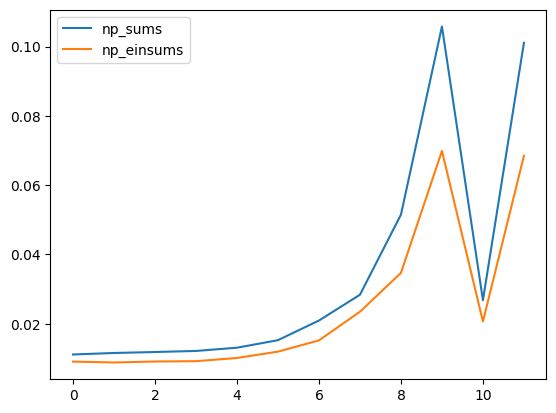

In [2]:
#### 41. How to sum a small array faster than np.sum? (★★☆)
_rng = np.random.default_rng(0x42)
_41 = _rng.normal(0, 1, 10)

np_sums = []
np_einsums = []
# Adding 8 steps of padding as for some reason sum is very slow first couple of iters, maybe some caching thing.
for s in ([1]*8) + [5, 10, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 10000, 50000]:
    if s != 1:
        print(f"{s=}")
    array = np.random.rand(s)  # Example size; adjust as needed

    def sum_with_np_sum():
        return np.sum(array)

    def sum_with_einsum():
        return np.einsum('i->', array)

    np_sum_time = timeit.timeit(sum_with_np_sum, number=10000)
    np_sums.append(np_sum_time)
    einsum_time = timeit.timeit(sum_with_einsum, number=10000)
    np_einsums.append(einsum_time)

    if s != 1:
        print(f"Time taken by np.sum: {np_sum_time*1000:.2f} ms.")
        print(f"Time taken by np.einsum: {einsum_time*1000:.2f} ms.")
        print()

np_sums = np_sums[8:]
np_einsums = np_einsums[8:]

plt.plot(range(len(np_sums)), np_sums, label = "np_sums")
plt.plot(range(len(np_einsums)), np_einsums, label = "np_einsums")
plt.legend()
plt.savefig("41.png")
plt.show()

In [3]:
#### 42. Consider two random array A and B, check if they are equal (★★☆)
_rng = np.random.default_rng(0x42)
_42_A = _rng.normal(0, 1, size = (5, 5))
_42_B = _rng.normal(0, 1, size = (5, 5))

print(np.isclose(_42_A, _42_B, atol = 1e-4))

[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


In [4]:
#### 43. Make an array immutable (read-only) (★★☆)_rng = np.random.default_rng(0x42)
_rng = np.random.default_rng(0x42)
_43 = _rng.normal(0, 1, size = (5, 5))

print(f"{_43[3, 4]=}")
_43[3, 4] = +1
print(f"{_43[3, 4]=}")

_43.flags.writeable = False
try:
    _43[3, 4] = -1
except ValueError:
    print("Not mutable anymore!")

_43[3, 4]=2.471384008303433
_43[3, 4]=1.0
Not mutable anymore!


In [5]:
#### 44. Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates (★★☆)
_rng = np.random.default_rng(0x42)
_44 = _rng.normal(0, 1, size = (10, 2))

rads = np.linalg.norm(_44, axis = 1)
rads_broadcasted = rads.reshape((10, 1))
rads_broadcasted = np.tile(rads_broadcasted, (1, 2))
_44_normalized = _44 / rads_broadcasted

# Recall arctan2(y / x) NOT arctan2(x / y)
angles = np.arctan2(_44_normalized[:, 1], _44_normalized[:, 0])

In [6]:
#### 45. Create random vector of size 10 and replace the maximum value by 0 (★★☆)
_rng = np.random.default_rng(0x42)
_45 = _rng.normal(0, 1, size = 10)
print(_45)
_45[_45.argmax()] = 0
print(_45)

[ 0.54103331 -0.5399175  -0.49271523 -1.05958543 -1.32601428 -1.55175407
  0.50182805  1.11961627  0.44104604  0.28548501]
[ 0.54103331 -0.5399175  -0.49271523 -1.05958543 -1.32601428 -1.55175407
  0.50182805  0.          0.44104604  0.28548501]


In [7]:
#### 46. Create a structured array with `x` and `y` coordinates covering the [0,1]x[0,1] area (★★☆)
import itertools

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

_46 = np.array([(x_, y_) for (x_, y_) in itertools.product(x, y)])

In [8]:
#### 47. Given two arrays, X and Y, construct the Cauchy matrix C (Cij =1/(xi - yj)) (★★☆)
_rng = np.random.default_rng(0x42)
_47_X = _rng.uniform(3, 4, size = 7)
_47_Y = _rng.uniform(1, 2, size = 5)

# The newaxis makes (n,) -> (n, 1) so broadcasting can take place
C = _47_X[:, np.newaxis] - _47_Y
np.divide(1, C, out = C)

array([[0.4022188 , 0.40589535, 0.49629157, 0.46905268, 0.41770903],
       [0.44340132, 0.44787347, 0.56052906, 0.5260276 , 0.4623005 ],
       [0.6114675 , 0.62000505, 0.85899918, 0.78054411, 0.64799916],
       [0.45730405, 0.46206256, 0.5829325 , 0.54570956, 0.47743387],
       [0.49140189, 0.49690073, 0.63949668, 0.59497535, 0.51472203],
       [0.41468071, 0.41858972, 0.51540296, 0.48608779, 0.43116535],
       [0.60049118, 0.60872291, 0.83749361, 0.76274679, 0.63568533]])

In [9]:
#### 48. Print the minimum and maximum representable value for each numpy scalar type (★★☆)
integer_types = [np.int8, np.int16, np.int32, np.int64,
                 np.uint8, np.uint16, np.uint32, np.uint64]

floating_types = [np.float32, np.float64]

print("Integer types:")
for int_type in integer_types:
    type_info = np.iinfo(int_type)
    print(f"{int_type.__name__}: min {type_info.min}, max {type_info.max}")

print("\nFloating-point types:")
for float_type in floating_types:
    type_info = np.finfo(float_type)
    print(f"{float_type.__name__}: min {type_info.min}, max {type_info.max}, eps {type_info.eps}")

Integer types:
int8: min -128, max 127
int16: min -32768, max 32767
int32: min -2147483648, max 2147483647
int64: min -9223372036854775808, max 9223372036854775807
uint8: min 0, max 255
uint16: min 0, max 65535
uint32: min 0, max 4294967295
uint64: min 0, max 18446744073709551615

Floating-point types:
float32: min -3.4028234663852886e+38, max 3.4028234663852886e+38, eps 1.1920928955078125e-07
float64: min -1.7976931348623157e+308, max 1.7976931348623157e+308, eps 2.220446049250313e-16


In [15]:
#### 49. How to print all the values of an array? (★★☆)
_rng = np.random.default_rng(0x42)
_49 = _rng.normal(0, 1, size = (1, 2, 3, 4))
for x in _49.reshape(-1):
    print(x)

0.5410333121383836
-0.5399175031243534
-0.4927152305939649
-1.0595854338686228
-1.3260142843485903
-1.551754074655718
0.5018280467397334
1.1196162692781544
0.44104604030177635
0.28548501057404885
0.29294670221993563
-0.1256096506233882
0.9729039542423004
-0.7762381480230125
1.0717850929350445
-0.15682788775763537
-0.05525076891045059
-1.2250147038912418
0.07992309425322004
2.471384008303433
-0.07250767409096634
-0.40001741308608596
0.3927297101377057
0.9904633819377031


In [24]:
#### 50. How to find the closest value (to a given scalar) in a vector? (★★☆)
_rng = np.random.default_rng(0x50)
_50 = _rng.normal(0, 1, 10)
y = 0.7
x_closest = _50[np.argmin((_50 - y)**2)]
x_closest

0.8668567773618027